In [2]:
import numpy as np
import scipy as sp
import networkx as nx

# Edge-Reinforced Random Walk (ERRW) 边强化随机游走
参考文章[Network Danamics of Innovation processes](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.120.048301)

在我们的实验中w代表weighted matrix, p代表transport matrix.
$$P^t(i \rightarrow j)=p_{ij}^t = \frac{w_{ij}^t}{\sum_{l}w_{il}^t}$$

$$w_{ij}^{t+1} = w_{ij}^t + \delta w$$


![errw](pic/errw.jpg)

为了节省内存，我们只不把每次迭代的权重矩阵(weighted matrix)保存下来.
1. N代表网络的节点数(# of nodes)
2. T代表时间的长度(length of time)
3. S表示保存的随机游走序列(sequence of random wark)

## Reamrk : 对无向图（有向图去掉一个加$\delta w$） ，节点标记为number

## 探索性分析过程

In [3]:
N = 20
T = 100
G = nx.erdos_renyi_graph(N, 0.5)

In [4]:
S = np.zeros(T)#这种形式不能储存顶点为string?
S[0] = np.random.choice(G.nodes(),size=1)
S

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
S = []
S.append(np.random.choice(G.nodes()))
S

[15]

In [8]:
w = np.array(nx.adj_matrix(G).toarray(), dtype=float)
print(w)

[[0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.

In [9]:
w_s = w.sum(1).reshape(-1, 1)
w_s

array([[10.],
       [ 8.],
       [ 8.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 9.],
       [10.],
       [ 5.],
       [ 8.],
       [ 7.],
       [10.],
       [ 9.],
       [10.],
       [ 6.],
       [ 8.],
       [ 8.],
       [15.]])

In [10]:
p = w / w_s
p.sum(1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [11]:
delta_w = 0.5

In [12]:
for i in range(T):   
    u = S[-1]
    neigb = list(G[u])
    pp = p[u][p[u]!=0]
    v = np.random.choice(neigb, p=pp)
    w[u, v]+= delta_w
    w[v, u]+= delta_w
    w_s = w.sum(1).reshape(-1, 1)
    p = w / w_s
    S.append(v)

In [13]:
print(S)

[15, 8, 7, 8, 12, 0, 6, 5, 19, 17, 12, 19, 15, 8, 3, 13, 14, 13, 2, 12, 19, 13, 2, 13, 5, 7, 0, 15, 8, 7, 5, 6, 19, 7, 5, 6, 15, 4, 19, 4, 8, 3, 16, 3, 8, 9, 15, 6, 19, 18, 1, 2, 13, 5, 13, 5, 19, 18, 19, 5, 7, 9, 10, 14, 10, 8, 3, 18, 11, 13, 2, 6, 0, 7, 9, 10, 14, 10, 16, 3, 18, 6, 1, 17, 19, 4, 19, 9, 8, 7, 19, 18, 3, 0, 3, 16, 3, 16, 3, 4, 8]


In [16]:
w.sum() - nx.adj_matrix(G).sum()

100.0

In [19]:
100/0.5 == 2*T

True

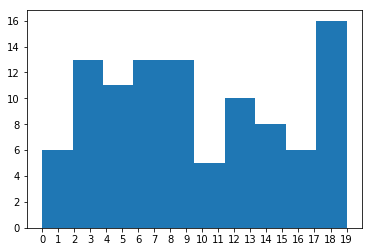

In [21]:
import matplotlib.pyplot as plt
plt.hist(S)
plt.xticks(range(N))
plt.show()

## 将上述整理成函数形式

In [42]:
def edge_reinforce_random_walk(G, T, delta_w = 0.5):
    # init value
    S = []
    S.append(np.random.choice(G.nodes()))
    w = np.array(nx.adj_matrix(G).toarray(), dtype=float)
    w_s = w.sum(1).reshape(-1, 1)
    p = w / w_s
    # update
    for i in range(T):   
        u = S[-1]
        neigb = list(G[u]) # neigh of u
        pp = p[u][p[u]!=0]
        v = np.random.choice(neigb, p=pp)
        w[u, v] += delta_w
        w[v, u] += delta_w
        w_s = w.sum(1).reshape(-1, 1)
        p = w / w_s
        S.append(v)
    return S, w

In [46]:
N = 100
G = nx.erdos_renyi_graph(N, 0.5)
T = 200
SS, ww = edge_reinforce_random_walk(G, T)

In [47]:
print(SS) # length T + 1

[68, 26, 3, 22, 26, 68, 64, 72, 90, 0, 85, 26, 14, 8, 71, 54, 38, 33, 49, 29, 77, 46, 86, 75, 86, 7, 73, 53, 42, 81, 22, 58, 16, 77, 52, 24, 80, 49, 87, 44, 63, 13, 86, 50, 33, 10, 54, 10, 33, 53, 73, 81, 56, 69, 33, 49, 74, 67, 23, 79, 67, 90, 52, 74, 62, 74, 81, 62, 58, 2, 87, 49, 4, 28, 2, 15, 39, 55, 12, 8, 88, 65, 97, 55, 15, 38, 87, 39, 58, 85, 31, 51, 71, 92, 25, 76, 81, 21, 26, 23, 62, 11, 86, 53, 4, 91, 48, 5, 16, 69, 95, 53, 86, 4, 44, 89, 85, 82, 65, 99, 76, 32, 53, 1, 21, 46, 71, 74, 63, 71, 42, 30, 15, 90, 20, 94, 54, 5, 33, 39, 33, 26, 45, 88, 37, 78, 38, 52, 42, 70, 33, 53, 61, 53, 81, 63, 82, 85, 87, 90, 15, 2, 31, 80, 14, 24, 14, 90, 84, 79, 57, 0, 9, 50, 4, 40, 11, 75, 56, 54, 57, 47, 85, 19, 11, 78, 26, 12, 31, 0, 35, 17, 12, 28, 4, 50, 74, 81, 51, 59, 76]


In [51]:
ww[5]

array([0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0. ,
       0. , 1. , 0. , 1.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 1. ,
       1. , 0. , 1. , 0. , 1. , 0. , 1. , 1.5, 0. , 0. , 1. , 0. , 0. ,
       0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1.5, 0. , 1. , 1. ,
       1. , 1. , 1.5, 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. ,
       0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       1. , 1. , 0. , 1. , 0. , 1. , 1. , 0. , 1. ])

In [53]:
nx.is_connected(G)

True

# Node-Reinforce Random Walk 节点强化随机游走 (假设而已)

1. $s_i^t$ 是$i$节点在$t$时刻的值. (value of node $i$)
2. $$p_{ij}^t = \frac{A_{ij}s_j^t}{\sum_lA_{il}s_l^t}$$
3. 从$i$节点走到$j$节点后更新$j$节点的值:(update value of node $j$)
4. $$s_j^{t+1} = s_j^t + \delta s $$

## 探索性分析

In [101]:
N = 10
s = np.ones(N, dtype=float)
s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [102]:
G = nx.erdos_renyi_graph(N, 0.5)

In [103]:
A = np.array(nx.adj_matrix(G).toarray(), dtype=float)

In [104]:
A

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 1., 1., 0., 0.]])

In [105]:
A*s

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 1., 1., 0., 0.]])

In [106]:
(A*s).sum(1).reshape(-1, 1)

array([[3.],
       [8.],
       [6.],
       [6.],
       [6.],
       [3.],
       [5.],
       [5.],
       [4.],
       [6.]])

In [107]:
p = A*s/(A*s).sum(1).reshape(-1, 1)
p.sum(1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
S = []
S.append(np.random.choice(G.nodes()))

In [109]:
S

[7]

In [110]:
delta_s = 0.5

In [111]:
T = 100

In [112]:
for i in range(T):
    u = S[-1]
    neigb = list(G[u])
    pp = p[u][list(G[u])]
    v = np.random.choice(neigb, p=pp)
    s[v] += delta_s
    p = A*s/(A*s).sum(1).reshape(-1, 1)
    S.append(v)

In [113]:
s

array([ 5.5,  4.5,  4.5,  4. , 13.5,  2. ,  4.5,  5.5,  4. , 12. ])

In [114]:
print(S)

[7, 4, 8, 4, 0, 1, 3, 9, 4, 9, 4, 7, 2, 9, 3, 9, 3, 2, 9, 4, 7, 1, 8, 0, 4, 0, 8, 4, 5, 1, 0, 4, 9, 6, 9, 4, 9, 4, 8, 0, 4, 9, 4, 0, 4, 8, 1, 0, 4, 0, 4, 9, 4, 9, 4, 5, 3, 6, 9, 6, 2, 6, 4, 9, 2, 8, 2, 9, 4, 7, 9, 4, 7, 1, 9, 7, 2, 9, 4, 0, 4, 9, 3, 7, 2, 9, 1, 7, 4, 6, 3, 6, 9, 6, 9, 4, 9, 4, 7, 1, 7]


## 整理成函数形式

In [123]:
def node_reinforce_random_walk(G, s=None,S0=None, T=200, delta_s=0.5):
    N = G.order()
    if s==None:
        s = s = np.ones(N, dtype=float)
    S = []
    S.append(np.random.choice(G.nodes()))
    A = np.array(nx.adj_matrix(G).toarray(), dtype=float)
    p = A*s/(A*s).sum(1).reshape(-1, 1)
    for i in range(T):
        u = S[-1]
        neigb = list(G[u])
        pp = p[u][list(G[u])]
        v = np.random.choice(neigb, p=pp)
        s[v] += delta_s
        p = A*s/(A*s).sum(1).reshape(-1, 1)
        S.append(v)
    return S, s

In [124]:
N = 100
G = nx.erdos_renyi_graph(N, 0.5)
SS, ss = node_reinforce_random_walk(G)

In [125]:
print(SS)

[27, 99, 93, 49, 22, 12, 38, 55, 23, 50, 76, 42, 55, 12, 64, 17, 61, 75, 12, 61, 11, 44, 8, 27, 3, 84, 90, 35, 55, 90, 39, 88, 39, 68, 80, 65, 24, 25, 99, 91, 11, 6, 27, 56, 26, 38, 60, 72, 15, 12, 62, 32, 38, 19, 74, 93, 57, 14, 82, 6, 19, 98, 76, 19, 68, 31, 43, 6, 58, 4, 90, 3, 94, 7, 41, 26, 88, 38, 12, 16, 35, 26, 11, 17, 95, 26, 2, 75, 65, 1, 43, 87, 58, 63, 58, 68, 72, 29, 43, 60, 24, 99, 72, 58, 80, 57, 15, 51, 95, 99, 82, 6, 93, 37, 75, 57, 56, 76, 24, 66, 24, 25, 93, 33, 23, 54, 23, 92, 29, 88, 72, 27, 43, 15, 27, 0, 54, 39, 84, 25, 2, 94, 88, 81, 79, 41, 78, 19, 11, 27, 33, 27, 2, 72, 68, 52, 73, 44, 26, 44, 93, 27, 13, 87, 65, 1, 88, 12, 31, 8, 94, 37, 48, 61, 68, 40, 36, 15, 3, 35, 76, 2, 58, 87, 8, 43, 23, 22, 90, 3, 31, 12, 95, 82, 49, 44, 3, 20, 12, 25, 22]


In [126]:
ss

array([1.5, 2. , 3. , 3.5, 1.5, 1. , 3. , 1.5, 2.5, 1. , 1. , 3. , 5. ,
       1.5, 1.5, 3. , 1.5, 2. , 1. , 3. , 1.5, 1. , 2.5, 3. , 3. , 3. ,
       3.5, 4.5, 1. , 2. , 1. , 2.5, 1.5, 2. , 1. , 2.5, 1.5, 2. , 3. ,
       2.5, 1.5, 2. , 1.5, 3.5, 3. , 1. , 1. , 1. , 1.5, 2. , 1.5, 1.5,
       1.5, 1. , 2. , 2.5, 2. , 2.5, 3.5, 1. , 2. , 2.5, 1.5, 1.5, 1.5,
       2.5, 1.5, 1. , 3.5, 1. , 1. , 1. , 3.5, 1.5, 1.5, 2.5, 3. , 1. ,
       1.5, 1.5, 2. , 1.5, 2.5, 1. , 2. , 1. , 1. , 2.5, 3.5, 1. , 3. ,
       1.5, 1.5, 3.5, 2.5, 2.5, 1. , 1. , 1.5, 3. ])

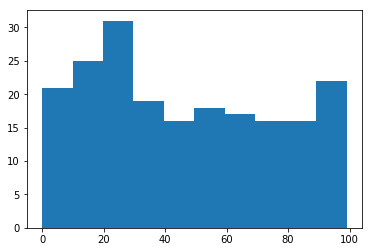

In [129]:
import matplotlib.pyplot as plt
plt.hist(SS)
plt.show()